In [22]:
import pandas as pd
import matplotlib.pyplot as plt

from utils import *

In [23]:
# Note; 2013-2014 file has dates formatted differently.
# To account for this we apply pd_datetime to the data one year at a time below, it can handle the different formats individually
FILE_YEAR_RANGES = ['2012-2013', '2013-2014', '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021_2022', '2022_2023']

DATA_DIRECTORY = 'external/USGS/Alaska Science Center/gulfWatch_intertidalTemperature'

loaded_dataframes = []
for year_range in FILE_YEAR_RANGES:
  file_name = f'{DATA_DIRECTORY}/Block04_KBAY/Intertidal_Temperature_KBAY_{year_range}.csv'
  year_df = pd.read_csv(file_name)
  year_df['dt'] = pd.to_datetime(year_df['date'] + ' ' + year_df['time'])
  loaded_dataframes.append(year_df)
df = pd.concat(loaded_dataframes)

# I think this should be Anchorage but I was having issues with daylight savings time
index = pd.DatetimeIndex(df['dt']).tz_localize('UTC')
df.set_index(index, inplace=True)
df.sort_index(inplace=True)

df.drop(['date','dt','time'], axis=1, inplace=True) # these are represented by the index now, unneeded
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1295463 entries, 2012-06-06 13:00:00+00:00 to 2023-05-21 06:00:00+00:00
Data columns (total 10 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   block        1295463 non-null  object 
 1   site         1295463 non-null  object 
 2   sensor       1295463 non-null  object 
 3   HOBO_ID      1295463 non-null  int64  
 4   tide_height  1295463 non-null  float64
 5   position     1295463 non-null  object 
 6   tidelevl     1111140 non-null  float64
 7   exposure     1295463 non-null  object 
 8   temperature  1295463 non-null  float64
 9   Tidelevl     184323 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 108.7+ MB


In [24]:
# Get the value counts
value_counts = df['sensor'].value_counts()

# Find the most common value
most_common_value = value_counts.idxmax()

# Get the count of the most common value
most_common_count = value_counts.max()

# Get the total number of entries
total_entries = len(df['sensor'])

# Print the results
print(f"The most common value '{most_common_value}' has {most_common_count} entries.")
print(f"The total number of entries is {total_entries}.")

The most common value 'Outside_Bch_0.5a' has 175698 entries.
The total number of entries is 1295463.


In [25]:
df = df[df['sensor'] == most_common_value]

In [26]:
def plot_temperatures(data):
  plt.figure(figsize=(40, 8))
  plt.plot(data.index, data,label="Temperature", color='blue')
  plt.xlim(data.index[0], data.index[-1])

  plt.title('Recorded Intertidal Temperature')
  # plt.xlabel('Date and Time')
  plt.ylabel('Temperature (°C)')
  plt.xticks(rotation=45)
  plt.legend()
  plt.tight_layout()
  

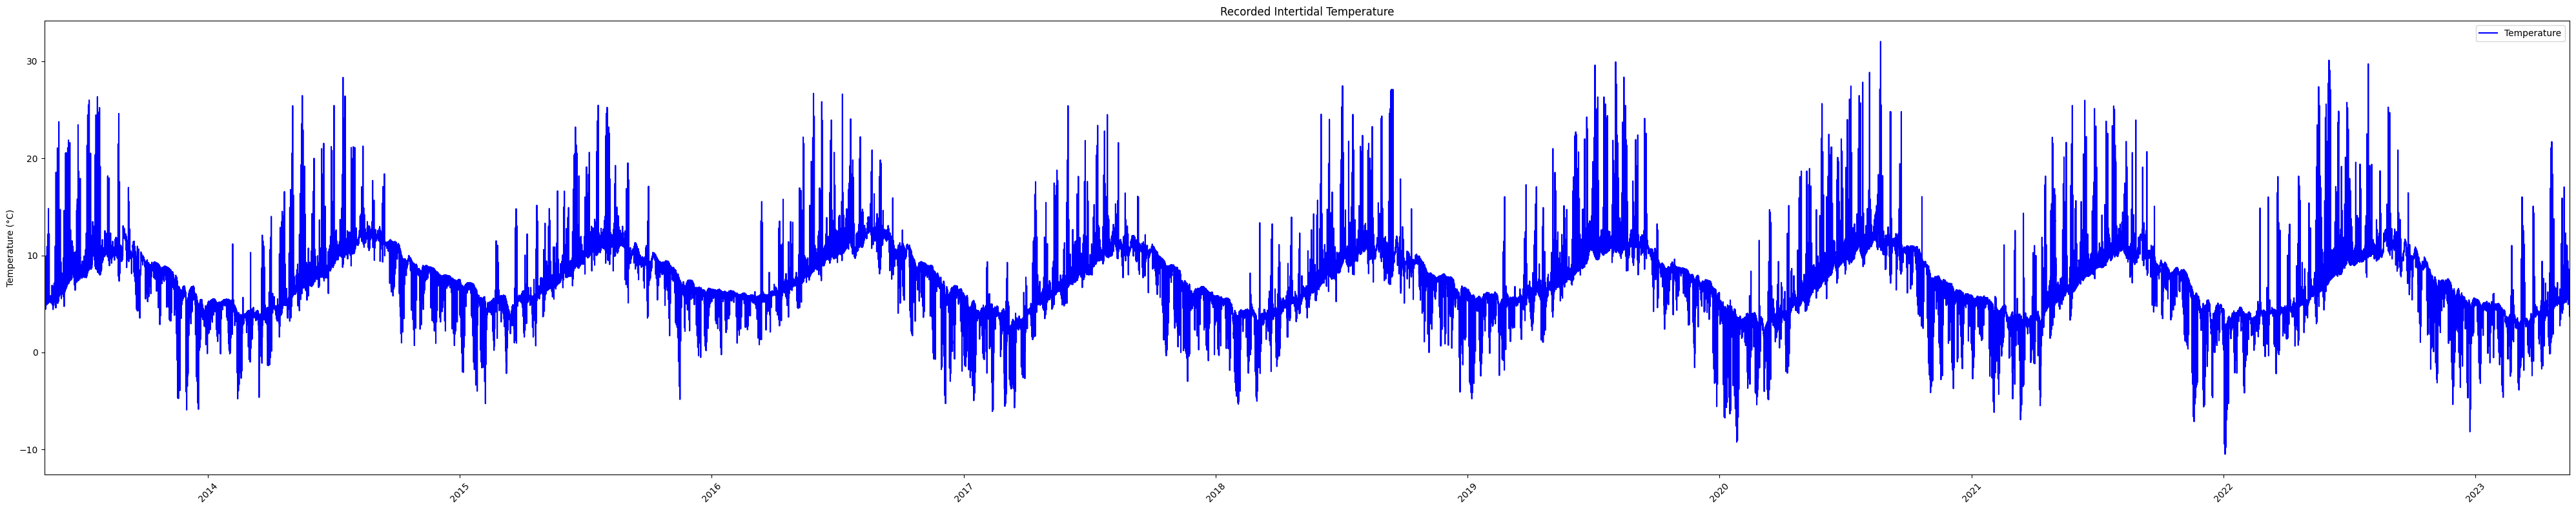

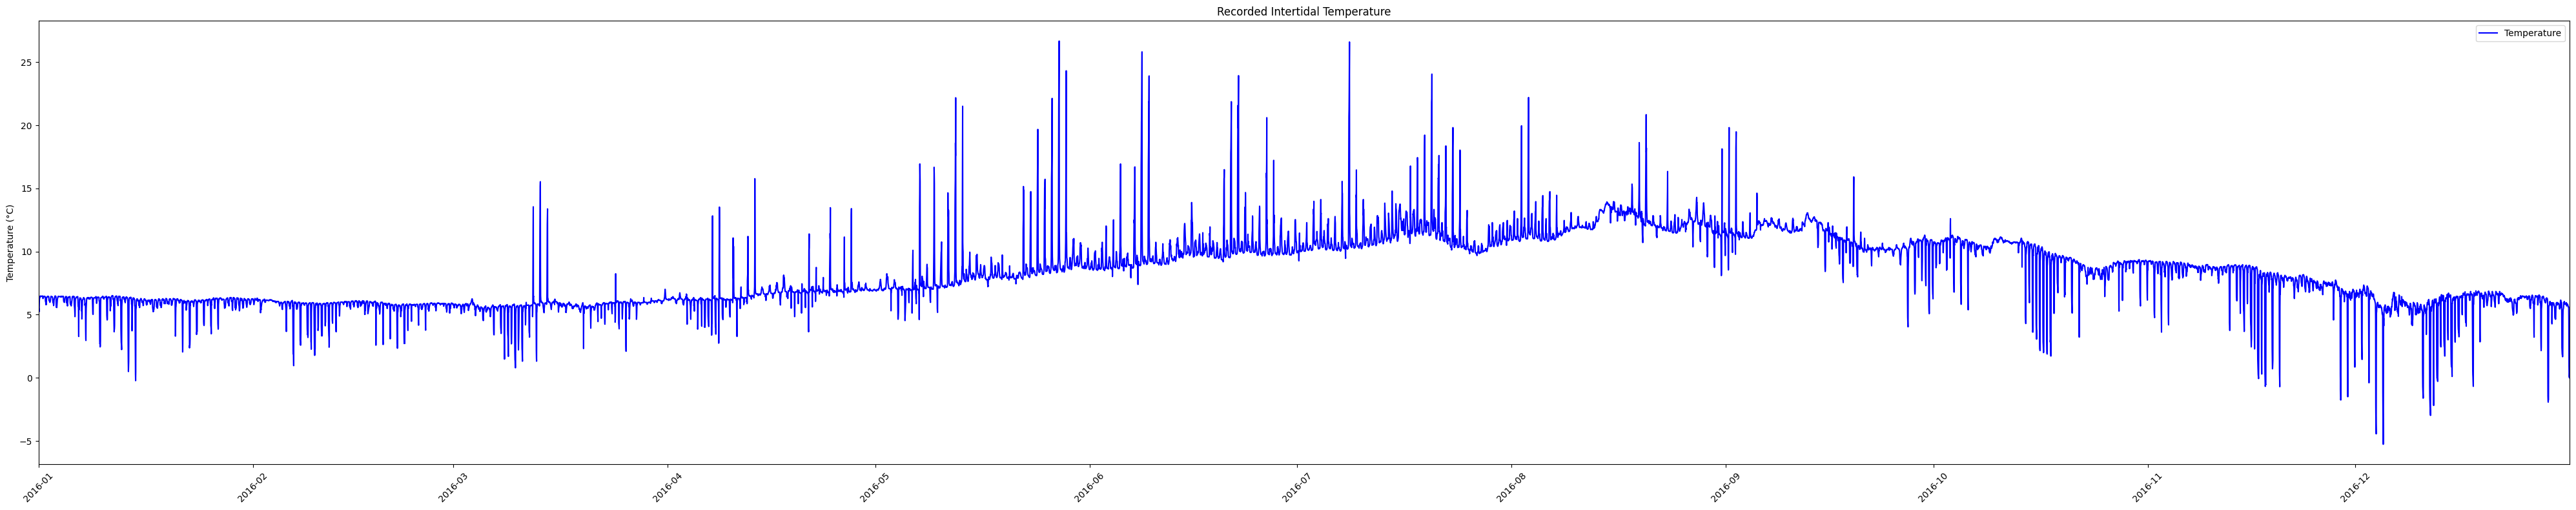

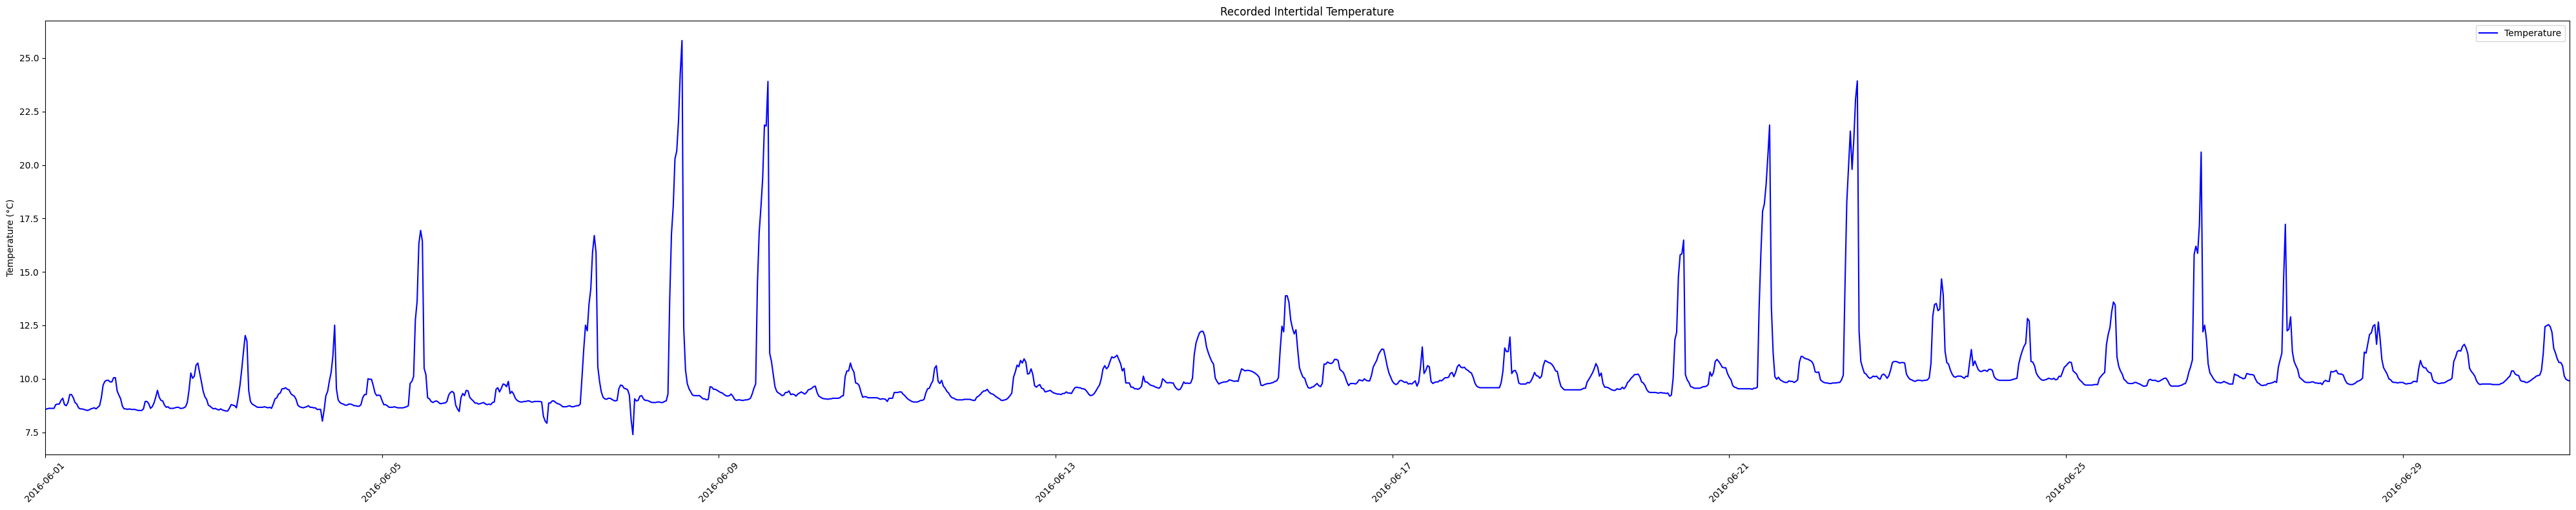

In [27]:
all_years = df['temperature']
data_ranges = [
  all_years,
  # all_years['2015':'2016'],
  all_years['2016'],
  # all_years['2016-05':'2016-07'],
  all_years['2016-06'],
  # all_years['2016-06-20']
  ]

for data_range in data_ranges:
  plot_temperatures(data_range)
  plt.show()

<Figure size 1400x700 with 0 Axes>

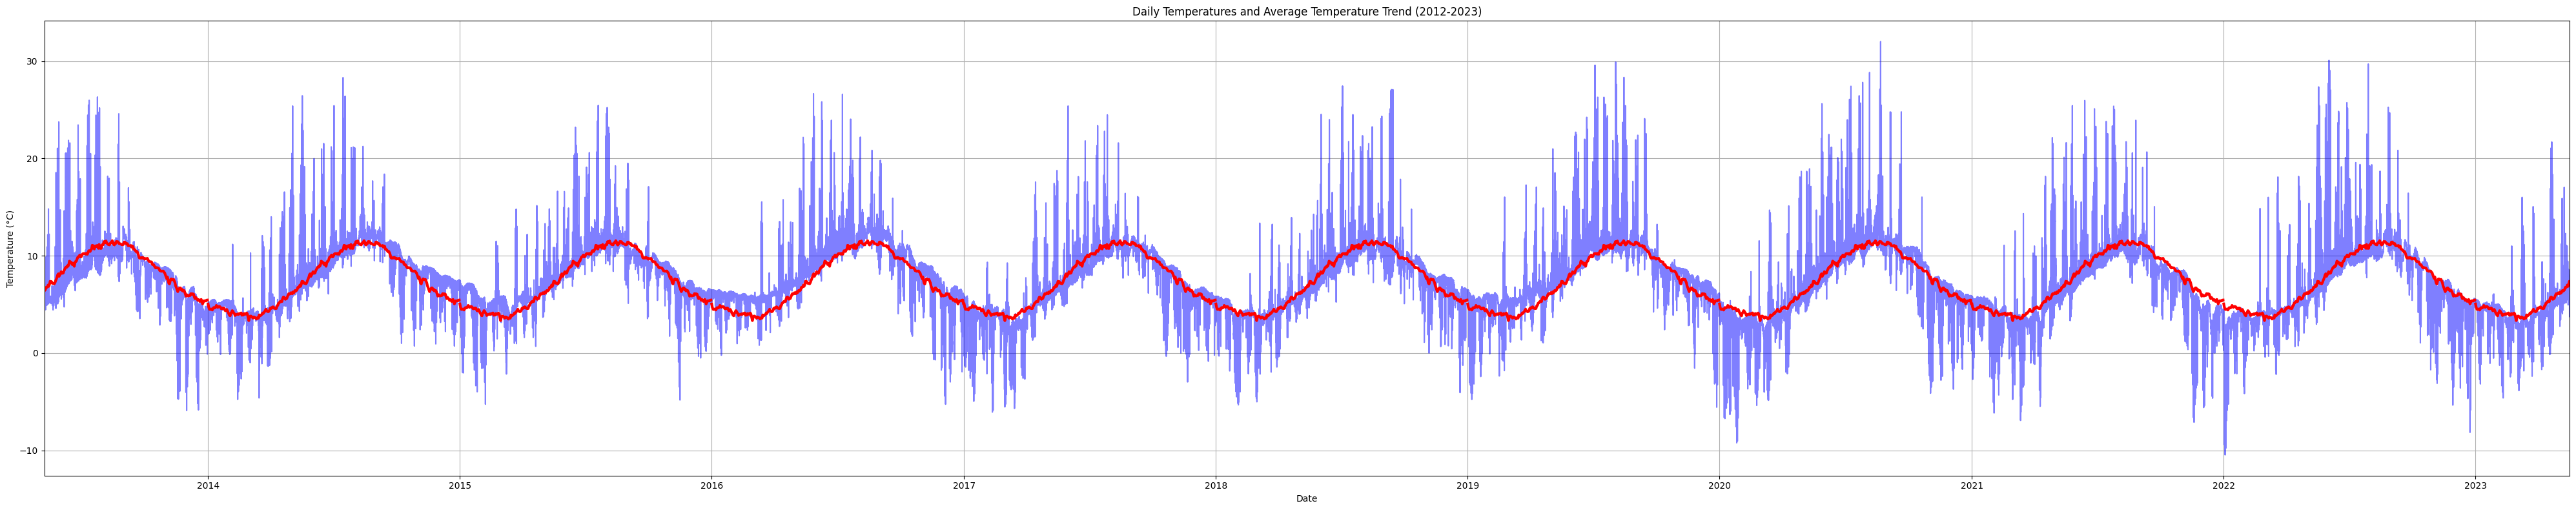

In [33]:
df['day_of_year'] = df.index.strftime('%j').astype(int)  # Use day of the year as a number (1-366)
daily_avg_temp = df.groupby('day_of_year')['temperature'].mean()

# Plotting
plt.figure(figsize=(14, 7))

# Plot each year's temperatures from original data
plt.figure(figsize=(40, 8))
plt.plot(df['temperature'].index, df['temperature'],label="Temperature", color='blue', alpha=0.5)
plt.xlim(df['temperature'].index[0], df['temperature'].index[-1])

# Prepare to overlay the average trend
for year in range(2013, 2024):

    
    # Create a full year date range taking into account leap years
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    dates = pd.date_range(start=start_date, end=end_date)
    
    # Map day_of_year to these dates, handling leap years
    temps = dates.dayofyear.map(daily_avg_temp)

    plt.plot(dates, temps, color="red", linewidth=3)#'k--', linewidth=1)  # Black dashed line for average trend

plt.title('Daily Temperatures and Average Temperature Trend (2012-2023)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
# plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

plt.grid(True)
plt.tight_layout()
plt.show()